In [0]:
import numpy as np
import pandas as pd
import operator
from functools import reduce
from collections import defaultdict
import math
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import random

In [0]:
def value():
    return 0
## Uses python dictionary or default dict for counting the words
# or counter class from collections 


class NaiveBayes:
    ''' Implements the Naive Bayes For Digit Classification '''
    def __init__(self, classes):
        self.classes = classes
        
        
    def addExample(self, x, y):
        '''
            Add example to corresponding class model
            Input
            ---------
            x: example (list of binary of image)
            y: label
        '''

        
    def train(self, X, Y):
        ''' Train the multiclass (or Binary) Bayes Rule using the given 
            X [m x d] data matrix and Y labels matrix
            
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional examples.
            Y: [m x 1] a label vector.
            

        '''
    
    
        self.ls = []
        self.ls_prior = []
        self.t_dict=defaultdict(value)
        self.count = []
        
        for i in range (0,len(self.classes)):
            Y = Y.ravel()
            x = X[Y == self.classes[i]]
            self.ls_prior.append((len(x)*1.0)/len(X))
            c = defaultdict(value)
            counter = 0
            
            for j in range(0,len(x)):
                
                for k in x[j]:
                    
                    c[k] += 1
                    self.t_dict[k] += 1
                    counter += 1
                    
            self.count.append(counter)        
            self.ls.append(c)        
               
        

    def test(self, X):
        
        ''' Test the trained classifiers on the given set of examples 
        
                   
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional test examples.
           
            Returns:
            -----------
                pclass: the predicted class for each example,
                        i.e. to which it belongs
        '''
        
        nexamples, nfeatures = X.shape
               
        ls_classes = []
        
        for sentence in X:
            ls_classes.append(self.predict(sentence))
        
        return np.array(ls_classes)

      
    def predict(self, x):
        '''
            Predict the label of given input example
            
            Input
            ---------
            x: example (list of words)
            
        '''
        
        # Calculate density
        prob_ls = []
        for c in range(0,len(self.classes)):
            prob = 0.0
            den = self.count[c]+len(self.t_dict)
            
            # Calculate probability
            for word in x:
                prob += math.log((self.ls[c][word]+1.0) / den)
            prob += math.log(self.ls_prior[c])
            prob_ls.append(prob)
        
        return self.classes[np.argmax(prob_ls)]

      
      
    def confusionMatrix(self, actual, predict, print_cfm=True, print_err_digit=True):
        '''
            Displays and returns a cfm - confusion matrix
            
            Input
            ---------
            actual: actual results of what the # was
            predict: prediction results of what the # was
            
        '''
      
        cfm = pd.DataFrame(confusion_matrix(actual, predict))
        if print_cfm:
            print('Testing Confusion Matrix: Actual vs. Prediction')
            display(cfm)
        return cfm


In [0]:
def splitString(string):
    return list(string)

In [0]:
def returnDataList(filepath):

    # read the Training data-set and return it : listt
    listt = []
    fp= open(filepath)
    lines = fp.readlines()
    ind = 0
    temp = []
    
    # nested for loops to read each line and assign each value a 0 or 1
    for line in lines:
        line = line[0:28]
        line = splitString(line)
        for index, item in enumerate(line):
            if(item == " "):
                line[index] = '0'
            elif( item == "+"):
                line[index] = '1'
            else:
                line[index] = '1'
        temp.append(line)
        ind += 1
        
        if(ind == 28):
            ind = 0
            temp = reduce(operator.concat,temp)
            temp = list(map(int, temp))
            listt.append(np.array(temp))
            temp = []
    return listt

In [0]:
def readDataLabels(path):
    # read and return the labels
    labelslist=[]
    fpath= open(path,'r')
    labels = fpath.readlines()
    for item in labels:
        labelslist.append(item.rstrip('\n'))
    all_labels = np.array(labelslist)
    return all_labels

In [0]:
# read the Training data-set
trainfilepath = './trainingimages'
traindata = np.array(returnDataList(trainfilepath))

# read the Training labels
train_label_filepath = './traininglabels'
traininglabels = readDataLabels(train_label_filepath)
traininglabels = traininglabels.reshape(5000,1)

# read the Test Labels
test_label_filepath = './testlabels'
testlabels = readDataLabels(test_label_filepath)
testlabels = testlabels.reshape(1000,1)

# read the Test data-set
testfilepath = './testimages'
testdata = np.array(returnDataList(testfilepath))


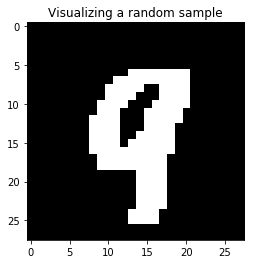

In [22]:
plt.imshow(np.reshape(traindata[random.randint(1,1000)], [28,28]), cmap='Greys_r'); plt.title('Visualizing a random sample'); plt.show()

In [9]:
#generate training and testing data...
print("Training data Dimensions =", traindata.shape," Training labels dimensions=", traininglabels.shape)
classes = np.unique(traininglabels)
print("Classes = ",classes)

Training data Dimensions = (5000, 784)  Training labels dimensions= (5000, 1)
Classes =  ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [0]:
# Create object and call train method
nb = NaiveBayes(classes)
nb.train(traindata,traininglabels)

In [0]:
pclasses = nb.test(testdata)

In [12]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(traindata, traininglabels)
MultinomialNB(alpha=0.05, class_prior=None, fit_prior=True)
predicted_classes = clf.predict(testdata)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
conf_matix = nb.confusionMatrix(testlabels, predicted_classes)

Testing Confusion Matrix: Actual vs. Prediction


,0,1,2,3,4,5,6,7,8,9
0,78,0,1,0,0,1,3,0,7,0
1,0,102,0,0,0,0,1,0,5,0
2,1,2,77,3,2,1,6,1,10,0
3,0,0,0,84,0,1,2,4,2,7
4,0,0,2,0,72,1,4,0,3,25
5,2,1,1,17,4,47,2,1,9,8
6,2,5,2,0,3,3,72,0,4,0
7,0,5,3,0,4,0,0,75,4,15
8,1,2,3,12,3,5,0,1,66,10
9,1,1,0,3,8,0,0,2,4,81


In [0]:
# Loop through each class (0-10) and add it to the total
total = 0
for i in range(0,10):
    total += conf_matix[i][i]

In [15]:
# Display the program's accuracy
acc = total / len(testlabels) * 100
print("Accuracy: ",str(acc) + "%")

Accuracy:  75.4%
